In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(type(x_train))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data consists of 60,000 grayscale images, each of 28*28 dimension

Testing data consists of 10,000 grayscale images, each of 28*28 dimension

Grayscale image is a 1 channel, RGB images are of 3 channels.

In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


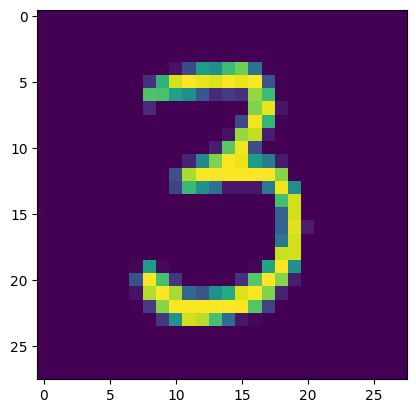

3


In [7]:
# Image display
plt.imshow(x_train[50])
plt.show()

# Corresponding Label
print(y_train[50])

Image Label Basic Analysis

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in y_train and y_test
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels directly, or, we can also apply One Hot Encoding

In [10]:
# Scaling / Normalization of data
x_train = x_train / 255
x_test = x_test / 255

In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Neural Network

In [12]:
# Layer set-up
model = keras.Sequential([
                             keras.layers.Flatten(input_shape = (28,28)),
                             keras.layers.Dense(50, activation = 'relu'),
                             keras.layers.Dense(50, activation = 'relu'),
                             keras.layers.Dense(10, activation = 'sigmoid')
])

In [13]:
# Compiling the Neural Network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

Training of Neural Network

In [14]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2958 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1046 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0833 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0501 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.034

In [15]:
# Checking on Test data accuracy
# Checking for Overfitting, which is, when accuracy on training data is high and low on testing data
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9732
0.9732000231742859


In [16]:
print(x_test.shape)

(10000, 28, 28)


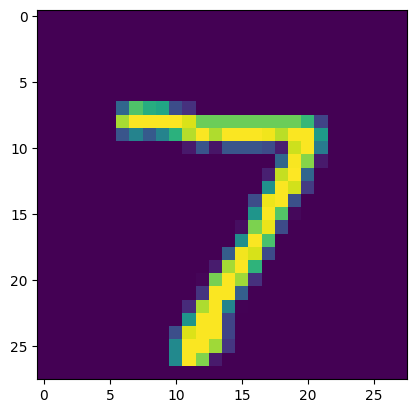

7


In [17]:
# First test point
plt.imshow(x_test[0])
plt.show()

# True value
print(y_test[0])

In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(y_pred.shape)

(10000, 10)


In [20]:
print(y_pred[0])

[4.6245659e-06 3.1769160e-02 9.0339646e-02 9.8183227e-01 4.4194167e-05
 4.2796440e-02 1.7829702e-09 9.9999994e-01 9.4320379e-02 3.9429855e-01]


model.predict() gives prediction probabilites for all 10 labels of each class

In [21]:
# converting the prediction probabilities through class labels
label_1st_image = np.argmax(y_pred[0])
print(label_1st_image)

7


In [22]:
# converting the prediction probabilities through class labels for all test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
print(y_pred)

[[4.62456592e-06 3.17691602e-02 9.03396457e-02 ... 9.99999940e-01
  9.43203792e-02 3.94298553e-01]
 [3.57080426e-04 9.99966443e-01 1.00000000e+00 ... 6.93817681e-04
  1.47582730e-02 2.06144633e-11]
 [1.03771465e-03 9.99582589e-01 4.94650543e-01 ... 1.12953305e-01
  1.52006820e-01 1.57649029e-05]
 ...
 [2.33582426e-07 2.49807053e-04 3.27246887e-08 ... 1.46419004e-01
  3.08478810e-02 9.90617096e-01]
 [2.67540145e-07 4.94960251e-09 1.27164953e-04 ... 2.38194644e-01
  5.41905224e-01 3.44985415e-06]
 [3.62148546e-02 1.13761089e-09 2.70440872e-03 ... 5.87619509e-09
  9.25531805e-01 7.53060667e-05]]


y_test -> True Labels

y_pred_labels -> Indexed Predicted values by the Neural Network

Confusion Matrix

In [24]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 962    0    0    1    2    3    3    2    4    3]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   4   13  991    6    2    0    2    6    7    1]
 [   0    0    6  978    0   15    0    3    8    0]
 [   0    0    3    1  966    3    1    0    0    8]
 [   1    0    0    7    1  873    5    1    1    3]
 [   4    3    1    1    4   12  931    0    2    0]
 [   1    7   11    1    1    0    0  998    3    6]
 [   3    0    5    7    8   12    0    5  928    6]
 [   3    2    0    7   19    3    1    4    1  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

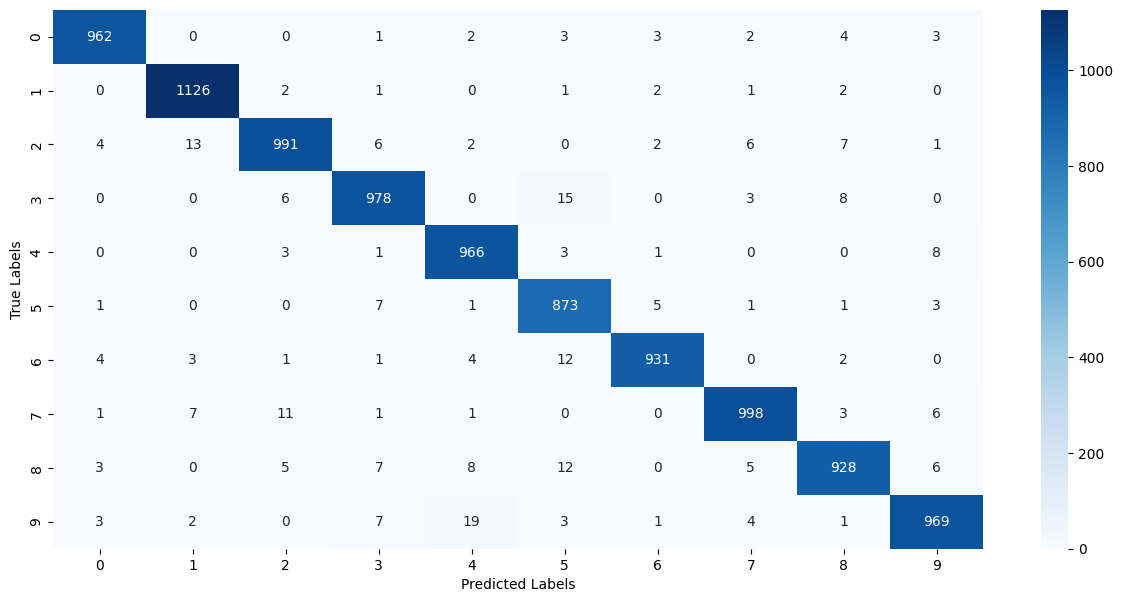

In [26]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Above confusion matrix can be inferred as -> Looking at (0,0) coordinate, we can say that 962 images of '0' has been correctly predicted as '0'.

Looking at coordinate (9,4) -> We can say that 19 images of '9' has been predicted as '4', which is wrong.

The diagonal always represents the correctly predicted values.

**Building a Predictive System**

In [27]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

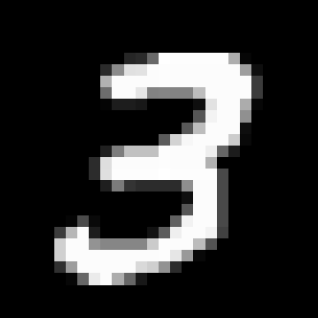

In [30]:
cv2_imshow(input_image)

In [31]:
print(input_image.shape)

(318, 318, 3)


In [33]:
grayscale_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
print(grayscale_img.shape)

(318, 318)


In [37]:
input_image_resize = cv2.resize(grayscale_img, (28,28))

In [39]:
print(input_image_resize.shape)

(28, 28)


In [40]:
cv2_imshow(input_image_resize)

In [41]:
# Scaling
input_image_resize = input_image_resize / 255
# Resizing, as we need to send one image at a time
image_reshape = np.reshape(input_image_resize, [1,28,28])

In [42]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 64ms/step
[[4.5571639e-08 1.0521861e-02 1.6631987e-02 1.0000000e+00 3.3040974e-12
  8.6239952e-01 4.6581395e-15 6.6926627e-04 8.4070253e-01 7.5719331e-04]]


In [43]:
input_pred_labels = np.argmax(input_prediction)

In [44]:
print(input_pred_labels)

3


Predictive System

Path of the image to be predicted : /content/MNIST_digit.png


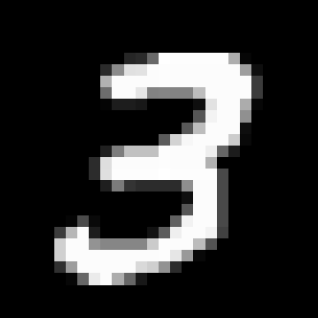

1/1 [==============================] - 0s 36ms/step
The handwritten image is recognized as : 3


In [45]:
input_image_path = input ('Path of the image to be predicted : ', )

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale_img, (28,28))

cv2_imshow(input_image_resize)

# Scaling
input_image_resize = input_image_resize / 255
# Resizing, as we need to send one image at a time
image_reshape = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshape)

input_pred_labels = np.argmax(input_prediction)

print("The handwritten image is recognized as :", input_pred_labels)

**Thank you**